<a href="https://www.kaggle.com/code/francescoliveras/ps-s3-e13-eda-model-en-es?scriptVersionId=127068412" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#37FABC; font-size:160%; text-align:center;padding: 0px; border-bottom: 5px solid #407A68">PlayGround Series S3 E13 EDA and simple model</p>

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 5px solid #008F77">Intro</p>
​
**🟦EN**:
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em; color:#5361fc;">
This Kaggle workbook aims to provide a comprehensive exploratory data analysis (EDA) and a set of simple models (which will not be optimized), but which can give a vague idea of how to choose the best model for the given data set, with the ultimate goal of making decisions.
Through this EDA, we will be able to get a deeper understanding of the structure of the data, the values that have a relationship between them and the missing values and pattern or outliers that may affect when performing the modeling or selecting the model we want to use for prediction/recommendation. By performing an EDA, we can identify potential pitfalls and make the decisions and subsequent processing necessary to improve the performance and accuracy of the models.
</div>
​
**🟥ES**: 
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em; background-color: #c9b1fa; color:#38196e;">
Este cuaderno Kaggle tiene el objetivo proporcionar un análisis exploratorio de datos (AED) exhaustivo y un conjunto de modelos simples (los cuales no estarán optimizados), pero que pueden llegar a dar una vaga idea para escoger el mejor modelo, para el conjunto de datos dado, con el objetivo final de tomar decisiones.
​
A través de este AED, podremos obtener una comprensión más profunda de la estructura de los datos, los valores que tiene una relación entre ellos y los valores que faltan y patrón o valores anómalos que pueda afectar a la hora de realizar el modelado o seleccionar el modelo que queremos utilizar para la predicción / recomendación. Al realizar un EDA, podemos identificar posibles obstáculos y tomar las decisiones, y posteriormente el procesado necesario para mejorar el rendimiento y la precisión de los modelos.
</div>

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Data information</p>

**🟦EN**
All symptoms and Prognosis included associated with 11 Vector Borne Diseases.
Chikungunya
Dengue
Zika
Yellow Fever
Raft Valley Fever
West Nile Fever
Malaria
Tungiasis
Japanese Encephalitis
Plague
Lyme Disease

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Vector Borne Disease Prediction dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance. Note that in the original dataset some prognoses contain spaces, but in the competition dataset spaces have been replaced with underscores to work with the MPA@K metric.


**🟥ES**
Todos los síntomas y Pronóstico incluidos asociados a 11 Enfermedades Transmitidas por Vectores.
Chikungunya
Dengue
Zika
Fiebre Amarilla
Fiebre del Valle del Raft
Fiebre del Nilo Occidental
Paludismo
Tungiasis
Encefalitis japonesa
Peste
Enfermedad de Lyme

El conjunto de datos para esta competición (tanto de entrenamiento como de prueba) se generó a partir de un modelo de aprendizaje profundo entrenado en el conjunto de datos de predicción de enfermedades transmitidas por vectores. Las distribuciones de las características son similares, aunque no exactamente iguales, a las del original. Siéntase libre de utilizar el conjunto de datos original como parte de esta competición, tanto para explorar las diferencias como para ver si la incorporación del original en el entrenamiento mejora el rendimiento del modelo. Tenga en cuenta que en el conjunto de datos original algunos pronósticos contienen espacios, pero en el conjunto de datos de la competición los espacios se han sustituido por guiones bajos para trabajar con la métrica MPA@K.

In [1]:
import os 
import sys
import math
import time
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.colors as mcolors

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier,plot_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,RepeatedStratifiedKFold,GridSearchCV

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression

warnings.filterwarnings('ignore')

In [2]:
# Put theme of notebook 
from colorama import Fore, Style

# Colors
red = Fore.RED + Style.BRIGHT
mgta = Fore.MAGENTA + Style.BRIGHT
yllw = Fore.YELLOW + Style.BRIGHT
cyn = Fore.CYAN + Style.BRIGHT
blue = Fore.BLUE + Style.BRIGHT

# Reset
res = Style.RESET_ALL

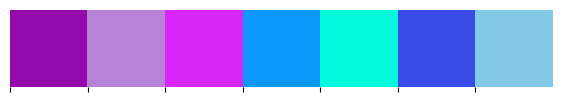

In [3]:
# Colors
YELLOW = "#F7C53E"

CYAN_G = "#0CF7AF"
CYAB_DARK = "#11AB7C"

PURPLE = "#D826F8"
PURPLE_DARJ = "#9309AB"
PURPLE_L = "#b683d6"

BLUE = "#0C97FA"
RED = "#FA1D19"
ORANGE = "#FA9F19"
GREEN = "#0CFA58"
LIGTH_BLUE = "#01FADC"
S_BLUE = "#81c9e6"
DARK_BLUE = "#394be6"
# Palettes
PALETTE_2 = [CYAN_G, PURPLE]
PALETTE_3 = [YELLOW, CYAN_G, PURPLE]
PALETTE_4 = [YELLOW, ORANGE, PURPLE, LIGTH_BLUE]
PALETTE_5 = [PURPLE_DARJ, PURPLE_L, PURPLE, BLUE, LIGTH_BLUE]
PALETTE_6 = [BLUE, RED, ORANGE, GREEN, LIGTH_BLUE, PURPLE]

# Vaporwave palette by Francesc Oliveras
PALETTE_7 = [PURPLE_DARJ, PURPLE_L, PURPLE, BLUE, LIGTH_BLUE, DARK_BLUE, S_BLUE]
PALETTE_7_C = [PURPLE_DARJ, BLUE, PURPLE, LIGTH_BLUE, PURPLE_L, S_BLUE, DARK_BLUE]

RANDOM_STATE = 500

sns.palplot(sns.color_palette(PALETTE_7))

# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

cmap = mcolors.LinearSegmentedColormap.from_list("", PALETTE_2)
cmap_2 = mcolors.LinearSegmentedColormap.from_list("", [S_BLUE, PURPLE_DARJ])

font_family = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=10), width=1000, height=500))

In [4]:
PATH = "/kaggle/input/playground-series-s3e13"
TRAIN_FILENAME = "train.csv"
TEST_FILENAME = "test.csv"
SUBMISSION_FILENAME = "sample_submission.csv"
ORIGINAL_PATH = "/kaggle/input/vector-borne-disease-prediction"
TEST_FILENAME_ORIGINAL = "testt.csv"
TRAIN_FILENAME_ORIGINAL = "trainn.csv"

# Data dir
TEST_DIR = os.path.join(PATH, TEST_FILENAME)
TRAIN_DIR = os.path.join(PATH, TRAIN_FILENAME)
TEST_ORIGINAL_DIR = os.path.join(ORIGINAL_PATH, TEST_FILENAME_ORIGINAL)
TRAIN_ORIGINAL_DIR = os.path.join(ORIGINAL_PATH, TRAIN_FILENAME_ORIGINAL)
SUBMISSION_DIR = os.path.join(PATH, SUBMISSION_FILENAME)

In [5]:
ID = "id"
SUDDEN_FEVER = "sudden_fever"
HEADACHE = "headache"
MOUTH_BLEED = "mouth_bleed"
NOSE_BLEED = "nose_bleed"
MUSCLE_PAIN = "muscle_pain"
JOINT_PAIN = "joint_pain"
VOMITING = "vomiting"
RASH = "rash"
DIARRHEA = "diarrhea"
HYPOTENSION = "hypotension"
PLEURAL_EFFUSION = "pleural_effusion"
ASCITES = "ascites"
GASTRO_BLEEDING = "gastro_bleeding"
SWELLING = "swelling"
NAUSEA = "nausea"
CHILLS = "chills"
MYALGIA = "myalgia"
DIGESTION_TROUBLE = "digestion_trouble"
FATIGUE = "fatigue"
SKIN_LESIONS = "skin_lesions"
STOMACH_PAIN = "stomach_pain"
ORBITAL_PAIN = "orbital_pain"
NECK_PAIN = "neck_pain"
WEAKNESS = "weakness"
BACK_PAIN = "back_pain"
WEIGHT_LOSS = "weight_loss"
GUM_BLEED = "gum_bleed"
JAUNDICE = "jaundice"
COMA = "coma"
DIZINESS = "diziness"
INFLAMMATION = "inflammation"
RED_EYES = "red_eyes"
LOSS_OF_APPETITE= 'loss_of_appetite'
URINATION_LOSS= 'urination_loss'
SLOW_HEART_RATE= 'slow_heart_rate'
ABDOMINAL_PAIN= 'abdominal_pain'
LIGHT_SENSITIVITY=  'light_sensitivity'
YELLOW_SKIN= 'yellow_skin'
YELLOW_EYES= 'yellow_eyes'
FACIAL_DISTORTION= 'facial_distortion'
MICROCEPHALY= 'microcephaly'
RIGOR= 'rigor'
BITTER_TONGUE= 'bitter_tongue'
CONVULSION= 'convulsion'
ANEMIA= 'anemia'
COCACOLA_URINE= 'cocacola_urine'
HYPOGLYCEMIA= 'hypoglycemia'
PROSTRACTION= 'prostraction'
HYPERPYREXIA= 'hyperpyrexia'
STIFF_NECK= 'stiff_neck'
IRRITABILITY= 'irritability'
CONFUSION= 'confusion'
TARGET = 'prognosis'

In [6]:
CATEGORICAL_COLS = []
NUM_COLS = []
BOOL_COLS = []
ORDINAL_COLS = []

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Functions</p>

In [7]:
def show_corr_heatmap(df, title):
    
    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize = (15, 10))
    plt.title(title)
    sns.heatmap(corr, annot = False, linewidths=.5, fmt=".2f", square=True, mask = mask, cmap=cmap_2)
    plt.show()

In [8]:
def data_description(df):
    print("Data description")
    print(f"Total number of records {df.shape[0]}")
    print(f'number of features {df.shape[1]}\n\n')
    columns = df.columns
    data_type = []
    
    # Get the datatype of features
    for col in df.columns:
        data_type.append(df[col].dtype)
        
    n_uni = df.nunique()
    # Number of NaN values
    n_miss = df.isna().sum()
    
    names = list(zip(columns, data_type, n_uni, n_miss))
    variable_desc = pd.DataFrame(names, columns=["Name","Type","Unique levels","Missing"])
    print(variable_desc)

In [9]:
def plot_cont(col, ax, color=PALETTE_7[0]):
    sns.histplot(data=comb_df, x=col,
                hue="set",ax=ax, hue_order=labels,
                common_norm=False, **histplot_hyperparams)
    
    ax_2 = ax.twinx()
    ax_2 = plot_cont_dot(
        comb_df.query('set=="train"'),
        col, TARGET, ax_2,
        color=color
    )
    
    ax_2 = plot_cont_dot(
        comb_df, col,
        TARGET, ax_2,
        color=color
    )

In [10]:
def plot_cont_dot(
    df, column, target, ax,
    show_yticks=False, color=PALETTE_7[0]
):

    bins = pd.cut(df[column], bins=n_bins)
    bins = pd.IntervalIndex(bins)
    bins = (bins.left + bins.right) / 2
    target = df[target]
    target = target.groupby(bins).mean()
    target.plot(
        ax=ax, linestyle="",
        marker=".", color=color,
        label=f"Mean {target.name}"
    )
    ax.grid(visible=False)
    
    if not show_yticks:
        ax.get_yaxis().set_ticks([])
        
    return ax

In [11]:
## Boolean values only
def pie_plot(df: pd.DataFrame, hover_temp: str = "Status: ",
            feature=TARGET, palette=[LIGTH_BLUE,"#221e8f"], color=[BLUE ,DARK_BLUE],
            title="Target distribution"):
#     df[feature] = df[feature].replace({0: "Not cancelled ", 1: "Cancelled"})
    target = df[[feature]].value_counts(normalize=True).sort_index().round(decimals=3)*100
    fig = go.Figure()
    
    fig.add_trace(go.Pie(labels=target.index, values=target, hole=.4,
                        sort=False, showlegend=True, marker=dict(colors=color, line=dict(color=palette,width=2)),
                        hovertemplate = "%{label} " + hover_temp + ": %{value:.2f}%<extra></extra>"))
    
    fig.update_layout(template=font_family, title=title, 
                  legend=dict(traceorder='reversed',y=1.05,x=0),
                  uniformtext_minsize=15, uniformtext_mode='hide',height=600)
    fig.show()

In [12]:
def append_dataframes(df1, df2, reset_index=True):
    """
    Append two pandas DataFrames along the rows.

    Parameters:
    df1 (pandas.DataFrame): The first DataFrame.
    df2 (pandas.DataFrame): The second DataFrame.
    reset_index (bool): Whether to reset the index of the resulting DataFrame (default: True).

    Returns:
    pandas.DataFrame: An appended DataFrame.
    """
    appended_df = pd.concat([df1, df2], axis=0, ignore_index=reset_index)
    return appended_df

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Import data</p>

In [13]:
train_df = pd.read_csv(TRAIN_DIR)
test_df = pd.read_csv(TEST_DIR)
test_original_df = pd.read_csv(TEST_ORIGINAL_DIR)
train_original_df = pd.read_csv(TRAIN_ORIGINAL_DIR)
submission_df = pd.read_csv(SUBMISSION_DIR)

train_original_df.prognosis = train_original_df.prognosis.str.replace(' ', '_')

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">EDA and data modification</p>

In [14]:
len(train_df.columns)

66

In [15]:
len(test_df.columns)

65

In [16]:
data_description(train_df)
data_description(test_df)
data_description(train_original_df)
data_description(test_original_df)

Data description
Total number of records 707
number of features 66


              Name     Type  Unique levels  Missing
0               id    int64            707        0
1     sudden_fever  float64              2        0
2         headache  float64              2        0
3      mouth_bleed  float64              2        0
4       nose_bleed  float64              2        0
..             ...      ...            ...      ...
61          ulcers  float64              2        0
62    toenail_loss  float64              2        0
63  speech_problem  float64              2        0
64   bullseye_rash  float64              2        0
65       prognosis   object             11        0

[66 rows x 4 columns]
Data description
Total number of records 303
number of features 65


              Name     Type  Unique levels  Missing
0               id    int64            303        0
1     sudden_fever  float64              2        0
2         headache  float64              2        0
3      

In [17]:
train_df = append_dataframes(train_df, train_original_df)
train_df.head()

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lyme_disease
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tungiasis
2,2.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,Lyme_disease
3,3.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika
4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Rift_Valley_fever


In [18]:
train_df.drop(ID, axis=1, inplace=True)
test_df.drop(ID, axis=1, inplace=True)

In [19]:
labels = ["train", "test", "original"]

In [20]:
comb_df = pd.concat([
    train_df.assign(set=labels[0]),
    test_df.assign(set=labels[1]),
    test_original_df.assign(set=labels[2]),
])
comb_df.reset_index(inplace=True)

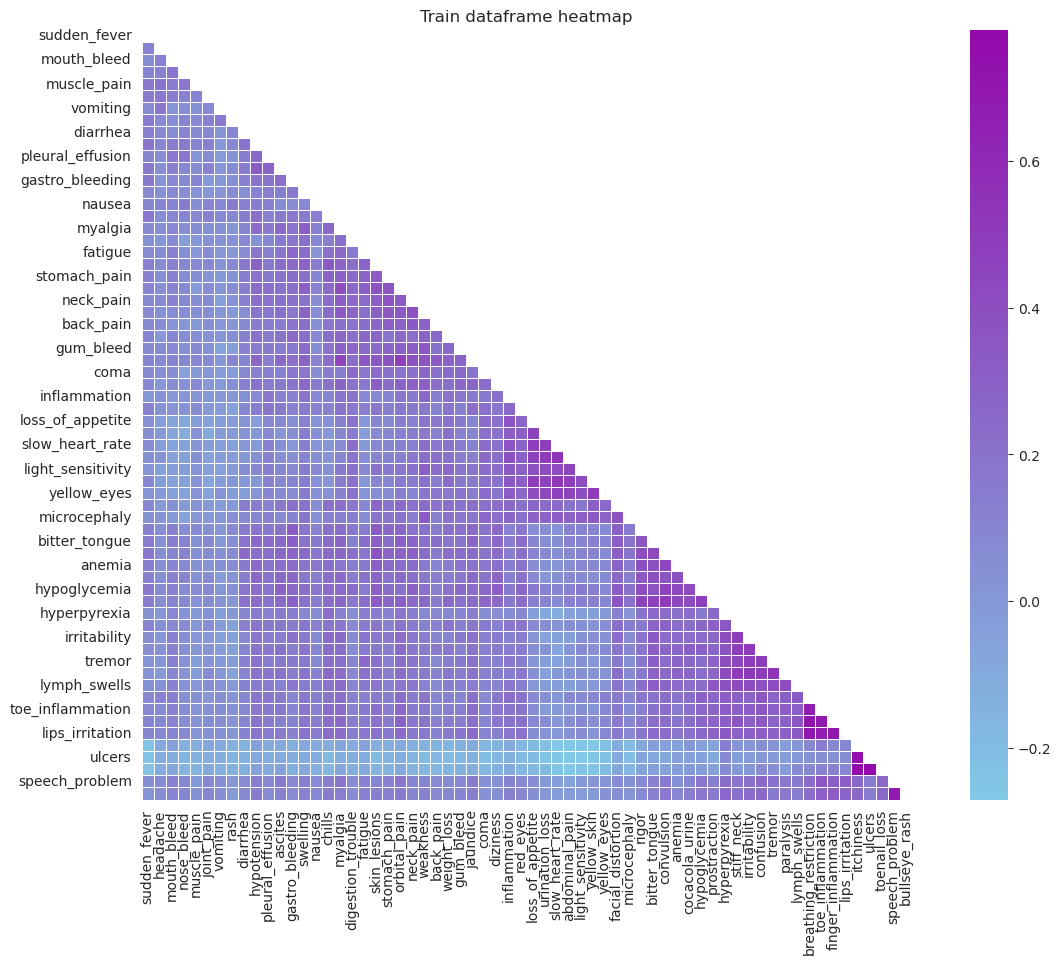

None

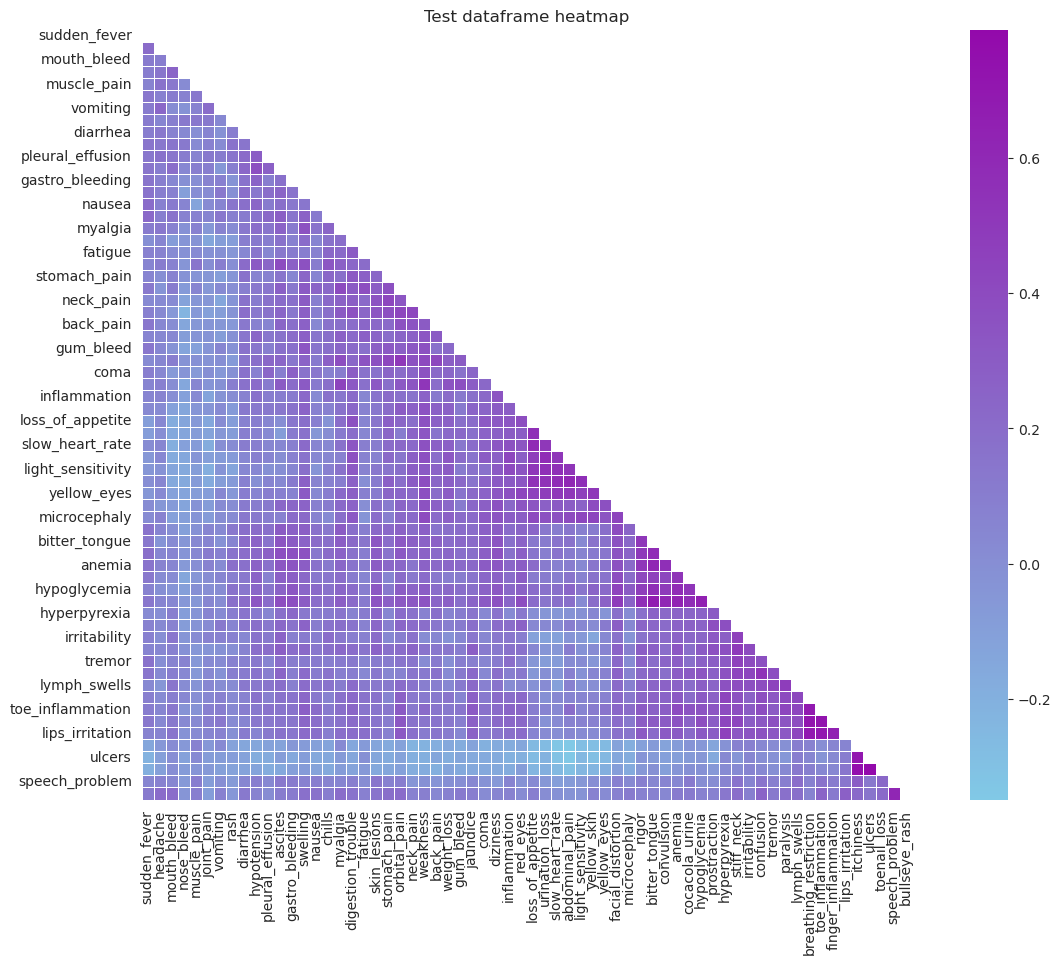

None

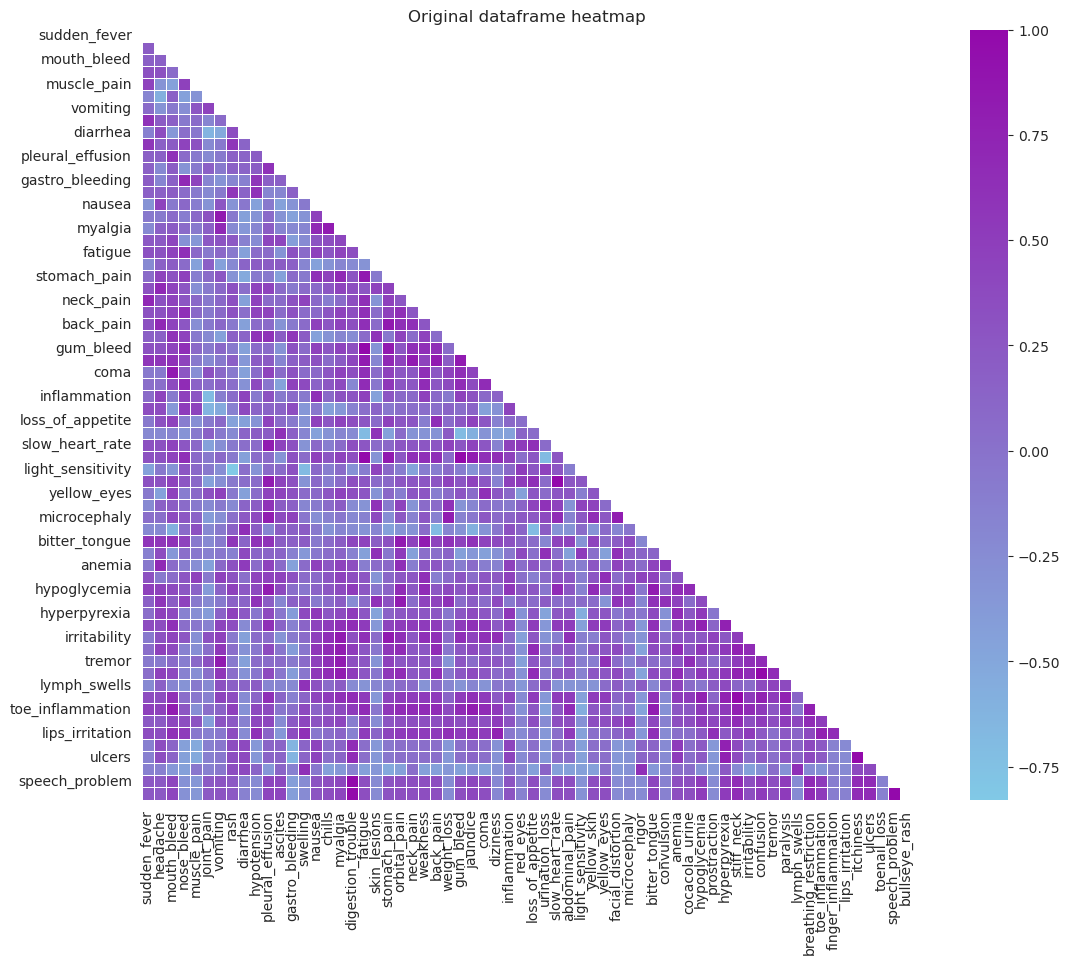

None

In [21]:
display(show_corr_heatmap(train_df, "Train dataframe heatmap"))
display(show_corr_heatmap(test_df, "Test dataframe heatmap"))
display(show_corr_heatmap(test_original_df, "Original dataframe heatmap"))

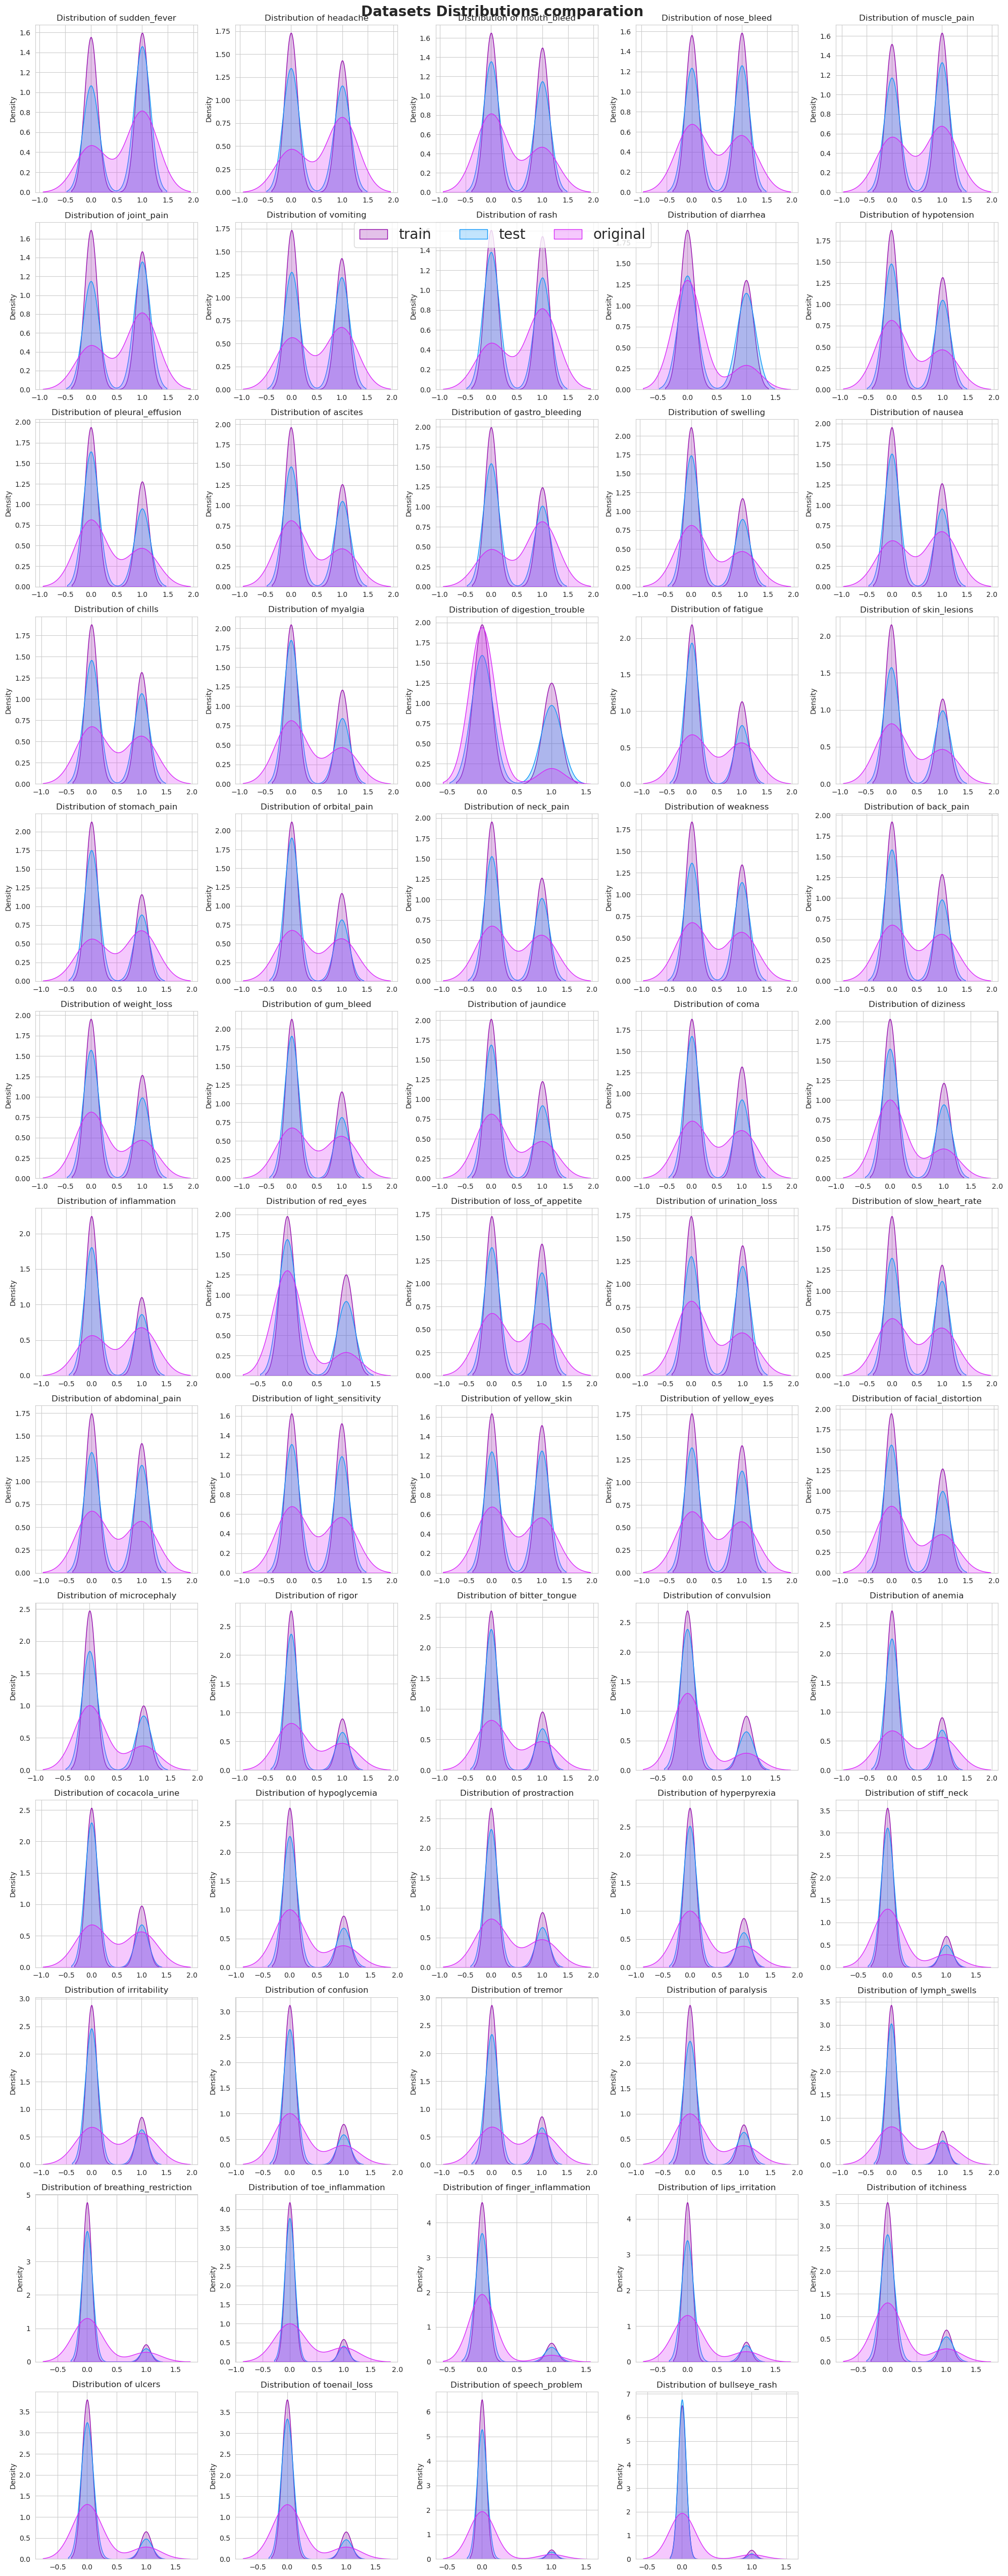

In [22]:
columns = test_df.columns
n_cols = 5
n_rows = math.ceil(len(columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
ax = ax.flatten()

for i, column in enumerate(columns):
    plot_axes = [ax[i]]
          
    sns.kdeplot(
        train_df[column], label="Train PS dataframe",
        ax=ax[i], color=PALETTE_7_C[0], fill = True
    )

    sns.kdeplot(
        test_df[column], label="Test PS datafraem",
        ax=ax[i], color=PALETTE_7_C[1], fill = True
    )
    
    sns.kdeplot(
        test_original_df[column], label="Original train dataframe",
        ax=ax[i], color=PALETTE_7_C[2], fill = True
    )
    
    # titles
    ax[i].set_title(f"Distribution of {column}");
    ax[i].set_xlabel(None)
    
    plot_axes = [ax[i]]
    handles = []
    for plot_ax in plot_axes:
        handles += plot_ax.get_legend_handles_labels()[0]
        plot_ax.legend().remove()
    
for i in range(i+1, len(ax)):
    ax[i].axis("off")
    
fig.suptitle(f"Datasets Distributions comparation\n\n", fontsize=20, ha="center", fontweight="bold")
fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, 0.9), fontsize=20, ncol=4)
plt.tight_layout()

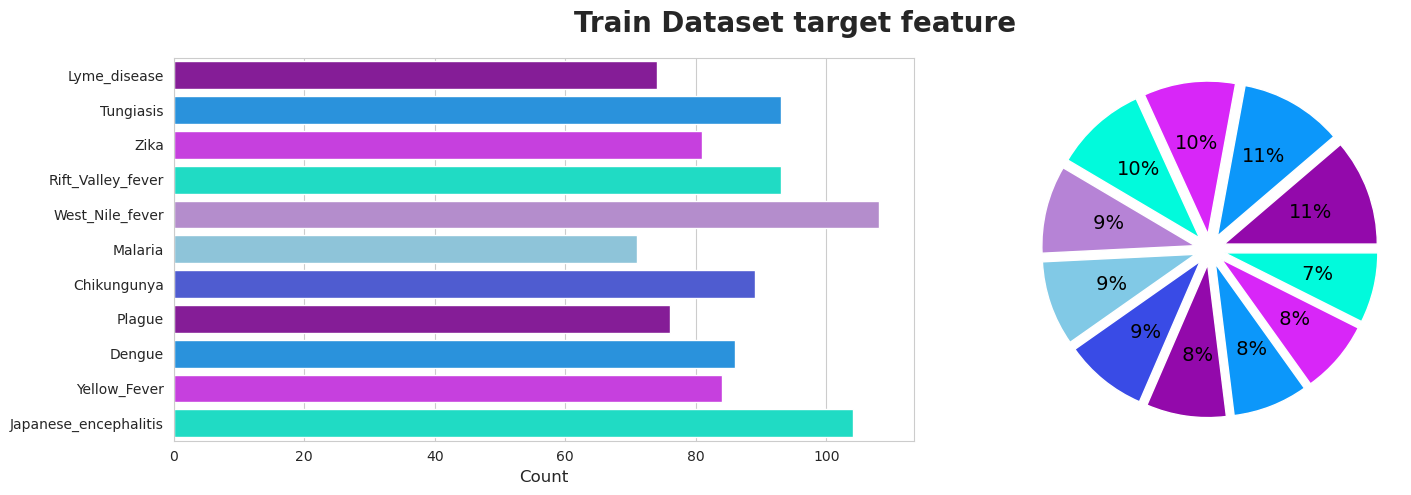

In [23]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))
ax = ax.flatten()

sns.countplot(data = train_df, y = TARGET, ax = ax[0], palette=PALETTE_7_C)
ax[0].yaxis.label.set_size(12)
plt.yticks(fontsize = 10)
ax[0].set_xlabel('Count', fontsize = 12)
ax[0].set_ylabel(None)
plt.xticks(fontsize = 12)

ax[1].pie(
    train_df[TARGET].value_counts(), 
    explode = [.1 for i in range(0, 11)], 
    autopct = '%2.f%%',
    textprops = {'size' : 14, 'color' : 'black'},
    colors=PALETTE_7_C
)

fig.suptitle('Train Dataset target feature', fontweight = 'bold', fontsize = 20)
plt.tight_layout()

In [24]:
X = train_df.copy()
y = X.pop(TARGET)

seed = 42
splits = 5
k = StratifiedKFold(n_splits = splits, random_state = seed, shuffle = True)

np.random.seed(seed)

In [25]:
y = [prognosis.replace(' ', '_') for prognosis in y]

enc = LabelEncoder()
y = enc.fit_transform(y)

In [26]:
from sklearn.svm import SVC, LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score, roc_curve, log_loss

def apk(actual, predicted, k=10):
    
    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    if not actual:
        return 0.0

    return score / min(len(actual), k)

def mapk(actual, predicted, k=10):
    
    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])
def cross_val_score(model, cv = k, label = ''):
    
    X = train_df.copy()
    y = X.pop('prognosis')
    
    #creating encoder and transforming prognosis
    enc = LabelEncoder()
    y = enc.fit_transform(y)
    
    #initiate prediction arrays and score lists
    val_predictions = np.zeros((len(train_df), 11))
    train_predictions = np.zeros((len(train_df), 11))
    train_logloss, val_logloss = [], []
    train_map3, val_map3 = [], []
    
    #training model, predicting prognosis probability, and evaluating log loss
    for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
                
        model.fit(X.iloc[train_idx], y[train_idx])
        
        train_preds = model.predict_proba(X.iloc[train_idx])
        val_preds = model.predict_proba(X.iloc[val_idx])
                  
        train_predictions[train_idx] += train_preds
        val_predictions[val_idx] += val_preds
        
        train_score = log_loss(y[train_idx], train_preds)
        val_score = log_loss(y[val_idx], val_preds)
        
        train_logloss.append(train_score)
        val_logloss.append(val_score)
        
        #select three most probable prognosis based on train dataset prediction
        train_index = np.argsort(-train_preds)[:,:3] #return index of three most probable prognosis
        
        #select three most probable prognosis based on validation dataset prediction
        val_index = np.argsort(-val_preds)[:,:3]
    
        #calculate map@3
        train_score = mapk(y[train_idx].reshape(-1, 1), train_index, 3)
        val_score = mapk(y[val_idx].reshape(-1, 1), val_index, 3)
        
        train_map3.append(train_score)
        val_map3.append(val_score)
    
    print(f'Val log_loss   : {np.mean(val_logloss):.5f} | Train log_loss   : {np.mean(train_logloss):.5f} | {label}')
    print(f'Val MAP@3 Score: {np.mean(val_map3):.5f} | Train MAP@3 Score: {np.mean(train_map3):.5f} | {label}\n')
    
    return val_logloss, val_map3
logloss_list, map3_list = pd.DataFrame(), pd.DataFrame()

models = [
    ('log', LogisticRegression(random_state = seed, max_iter = 10000)),
    ('svc', SVC(random_state = seed, probability = True)),
    #('lda', LinearDiscriminantAnalysis()),
    #('qda', QuadraticDiscriminantAnalysis()),
    ('gauss', GaussianProcessClassifier(random_state = seed)),
    ('et', ExtraTreesClassifier(random_state = seed)),
    ('rf', RandomForestClassifier(random_state = seed)),
    ('xgb', XGBClassifier(random_state = seed, objective = 'multi:softprob', eval_metric = 'map@3')),
    ('lgb', LGBMClassifier(random_state = seed, objective = 'softmax', metric = 'softmax')),
    ('dart', LGBMClassifier(random_state = seed, objective = 'softmax', metric = 'softmax', boosting_type = 'dart')),
    ('cb', CatBoostClassifier(random_state = seed, objective = 'MultiClass', verbose = 0)),
    ('gb', GradientBoostingClassifier(random_state = seed)),
    ('hgb', HistGradientBoostingClassifier(random_state = seed)),
    ('ada', AdaBoostClassifier(random_state = seed)),
    ('knn', KNeighborsClassifier())
]

for (label, model) in models:
    (logloss_list[label], map3_list[label]) = cross_val_score(model, label = label)

Val log_loss   : 1.96725 | Train log_loss   : 1.19492 | log
Val MAP@3 Score: 0.41745 | Train MAP@3 Score: 0.62691 | log

Val log_loss   : 1.67955 | Train log_loss   : 1.03240 | svc
Val MAP@3 Score: 0.47724 | Train MAP@3 Score: 0.76064 | svc

Val log_loss   : 2.32613 | Train log_loss   : 2.02936 | gauss
Val MAP@3 Score: 0.41175 | Train MAP@3 Score: 0.90059 | gauss

Val log_loss   : 2.14656 | Train log_loss   : 0.00000 | et
Val MAP@3 Score: 0.45014 | Train MAP@3 Score: 0.90720 | et

Val log_loss   : 1.99753 | Train log_loss   : 0.32819 | rf
Val MAP@3 Score: 0.45136 | Train MAP@3 Score: 0.90720 | rf

Val log_loss   : 2.23851 | Train log_loss   : 0.03888 | xgb
Val MAP@3 Score: 0.40304 | Train MAP@3 Score: 0.90720 | xgb

Val log_loss   : 2.53749 | Train log_loss   : 0.00986 | lgb
Val MAP@3 Score: 0.41627 | Train MAP@3 Score: 0.90720 | lgb

Val log_loss   : 1.86847 | Train log_loss   : 0.31318 | dart
Val MAP@3 Score: 0.42287 | Train MAP@3 Score: 0.90211 | dart

Val log_loss   : 1.83604 | Tra

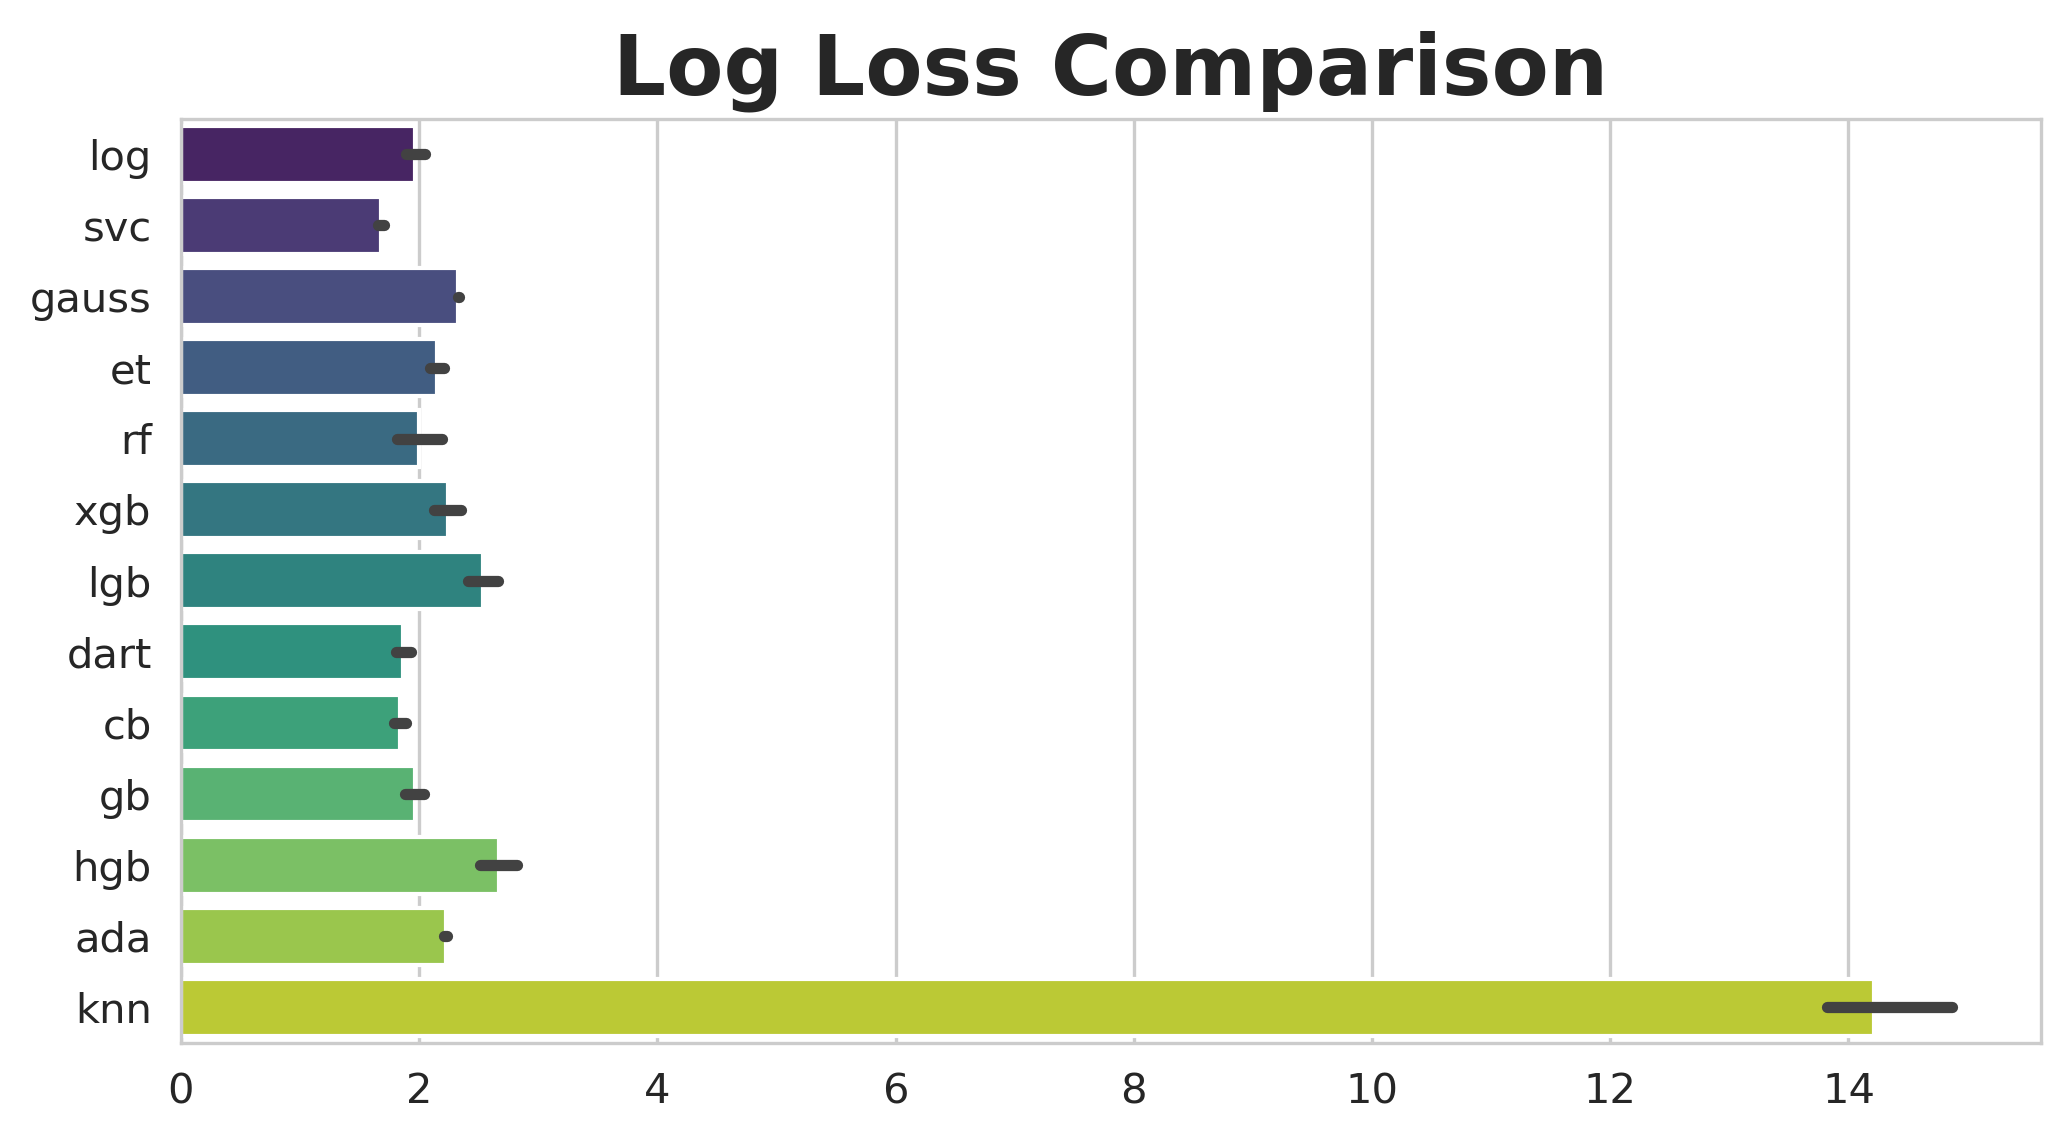

In [27]:
plt.figure(figsize = (8, 4), dpi = 300)
sns.barplot(data = logloss_list, palette = 'viridis', orient = 'h')
plt.title('Log Loss Comparison', weight = 'bold', size = 20)
plt.show()

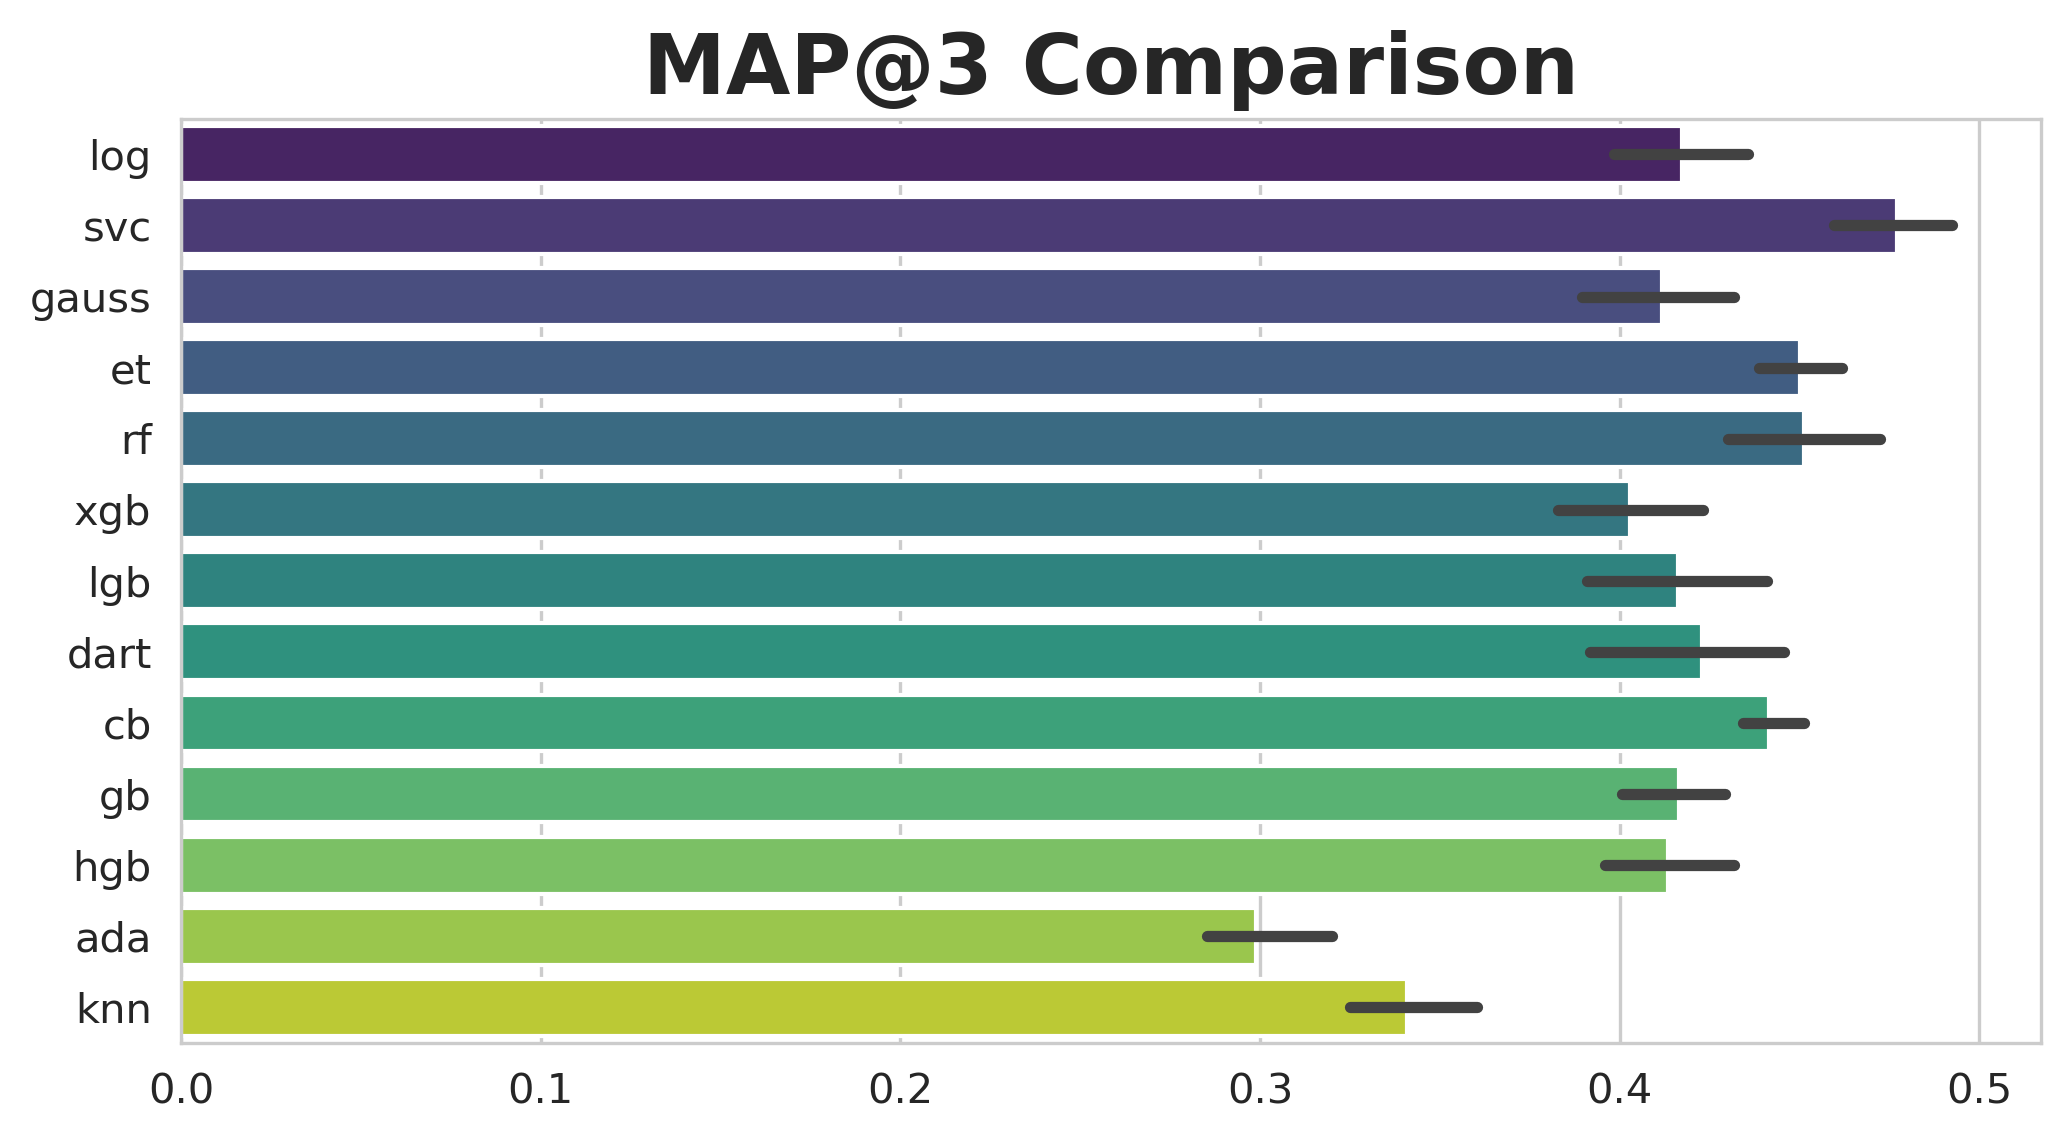

In [28]:
plt.figure(figsize = (8, 4), dpi = 300)
sns.barplot(data = map3_list, palette = 'viridis', orient = 'h')
plt.title('MAP@3 Comparison', weight = 'bold', size = 20)
plt.show()